---
title: Regression
project:
  type: website
format:
  html:
    code-fold: true
    code-tools: true
jupyter: python 3
number-sections: true
---

In this notebook, we'll implement an example application of linear regression applied to behavioral and electrophysiologicial data.

In [1]:
# Load modules
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the data

The example behavioral and electrophysiologicial data is [regression_example_data.mat](/Data/regression_example_data.mat). Get these data, and load them:

In [2]:
data             = sio.loadmat('Data/regression_example_data.mat')       # Load the experimental data
task_performance = data['task_performance']
firing_rate      = data['firing_rate']

# Visualize the data

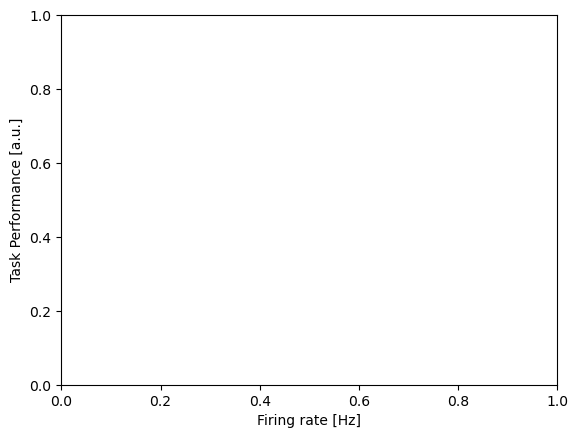

In [3]:
# Plot it ...
plt.xlabel('Firing rate [Hz]')
plt.ylabel('Task Performance [a.u.]');

# Correlation

Compute the [correlation](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html) between $x$ and $y$. 

In [4]:
N = firing_rate[:,0].size
x = firing_rate[:,0] - firing_rate[:,0].mean()
y = task_performance[:,0] - task_performance[:,0].mean()
correlation = 'Correlation Calculation'
print(correlation)

Correlation Calculation


# Regression (compute it)

Model the data using regression.

In [5]:
from statsmodels.formula.api import ols

data = {"x": firing_rate, "y": task_performance}

res1 = ols("y ~1 + x", data=data).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                  0.001521
Date:                Mon, 12 Aug 2024   Prob (F-statistic):              0.969
Time:                        15:37:13   Log-Likelihood:                -119.04
No. Observations:                  50   AIC:                             242.1
Df Residuals:                      48   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0190      4.037      3.720      0.001       6.901      23.137
x              0.0158      0.404      0.039      0.969      -0.797       0.829
==============================================================================
Omnibus:                        4.793   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.249
Skew:                           0.459   Prob(JB):                        0.197
Kurtosis:                       2.153   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression (plot it)

Plot the estimated regression model with the data.

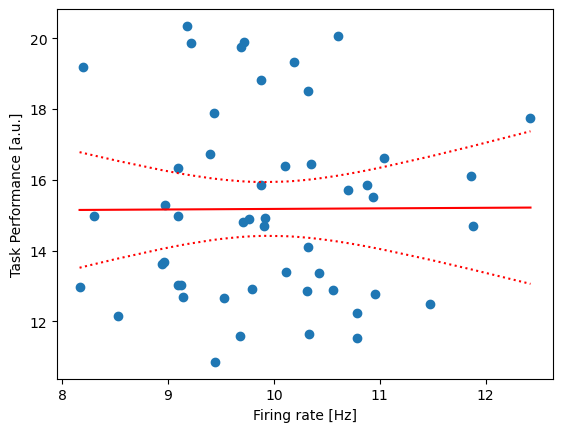

In [6]:
# Get model prediction.
pred   = res1.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']
# And plot it.
indices_sorted = np.argsort(firing_rate,0)
plt.scatter(firing_rate,task_performance)
plt.plot(firing_rate[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(firing_rate[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(firing_rate[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Firing rate [Hz]')
plt.ylabel('Task Performance [a.u.]');

---
# Regression example (Part 2)

We learn that an additional predictor - age - impacts task performance.

In [7]:
## Load the data, now with age.
data             = sio.loadmat('Data/regression_example_data.mat')       # Load the experimental data
task_performance = data['task_performance']
firing_rate      = data['firing_rate']
age              = data['age']

# Visualize the new data

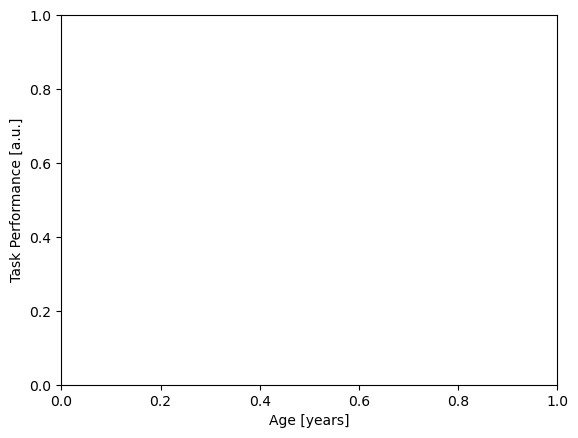

In [8]:
# Plot it ...
plt.xlabel('Age [years]');
plt.ylabel('Task Performance [a.u.]');

# Correlation (between task performance and age)

In [9]:
# Compute the correlation between task performance and age

# Visualize all data

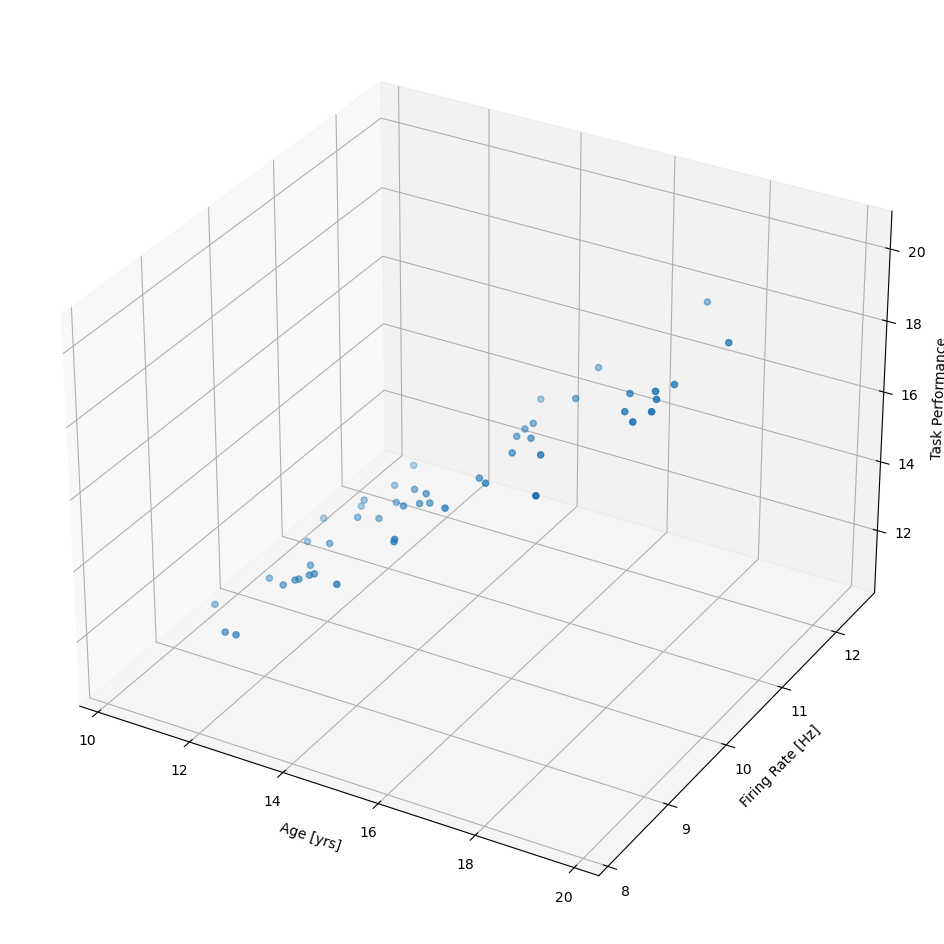

In [10]:
fig = plt.figure(figsize=(12, 12))
ax  = fig.add_subplot(projection='3d')
ax.scatter(age, firing_rate, task_performance)
ax.set_xlabel('Age [yrs]')
ax.set_ylabel('Firing Rate [Hz]')
ax.set_zlabel('Task Performance');

# Regression (compute it with all data)

Model all data using regression.

In [11]:
from statsmodels.formula.api import ols
data = {"firing_rate": firing_rate, "age": age, "y": task_performance}
# Write the model and print out the summary

# Regression (plot it with all data)

Plot the estimated regression model with two predictors and all data.

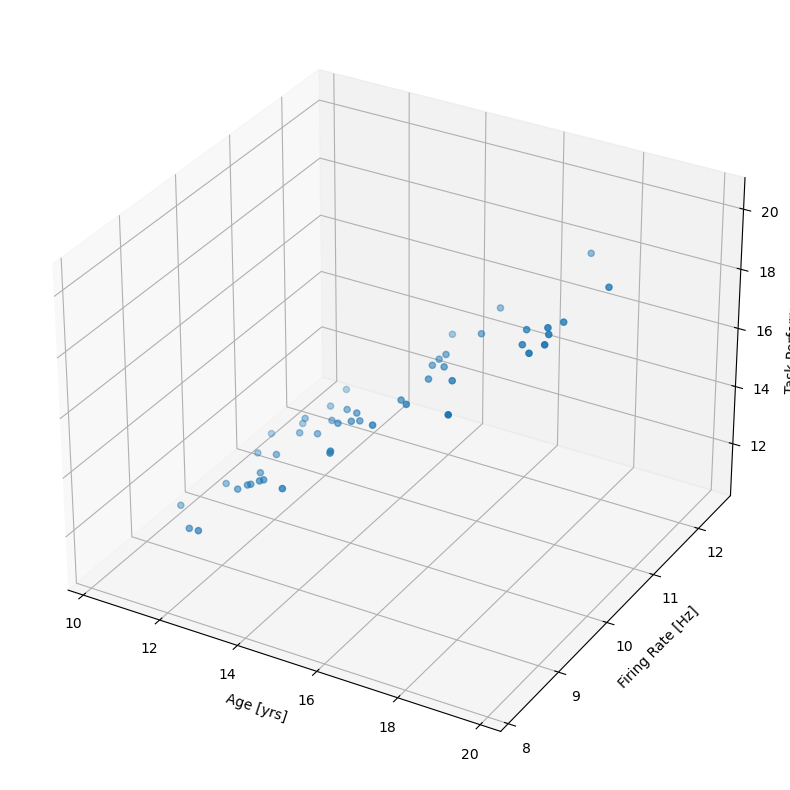

In [13]:
# And plot the mean model fit.
fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(projection='3d')
ax.set_xlabel('Age [yrs]')
ax.set_ylabel('Firing Rate [Hz]')
ax.set_zlabel('Task Performance');
ax.scatter(age, firing_rate, task_performance);
x = np.arange(8, 12, 0.1)  # Firing rate
y = np.arange(10,20, 0.1)  # Age
xx, yy = np.meshgrid(x, y) # Model
# zz = res.params[0] + res.params[1]*xx + res.params[2]*yy
# ax.plot_surface(yy,xx,zz);